In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.


,Unnamed: 0,is_E,is_N,is_F,is_J,posts,cleans,com_stmt,pos_stmt,neg_stmt,...,xd,ya,yep,yesterday,yet,young,younger,youtub,yup,zone
0,0,0,1,1,0,"'probably chiming in real late, but if he's an...",probabl chime real late enfp least much extrov...,0.9994,0.161,0.098,...,0,0,0,1,0,1,0,0,0,0
1,1,0,1,1,0,'I really like the way you put that. It makes ...,realli like way put make lot sens especi drama...,0.9918,0.116,0.094,...,0,0,0,1,2,0,0,1,0,0
2,2,0,1,1,0,'I thought this article was very enlightening....,thought articl veri enlighten basic assert nat...,0.9998,0.201,0.077,...,0,0,1,0,1,0,0,1,0,0
3,3,0,1,1,0,'I am an INFP and that sounds way too stereoty...,infp sound way stereotyp becom want without ne...,0.9998,0.186,0.065,...,0,0,0,1,0,0,2,0,0,0
4,4,0,1,1,0,"'I don't really relate to most of it, to be ho...",realli relat honest sensit sound realli realli...,0.9996,0.140,0.051,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,619,1,1,1,1,'Hey all! Jeez I'm still having laptop issues!...,hey jeez still laptop issu jawz alway prefer n...,0.9996,0.172,0.079,...,0,0,1,0,0,0,1,0,0,0
620,620,1,1,1,1,'One of my biggest turn-off's and I think its ...,one biggest turn think enfj thing exclud peopl...,0.9999,0.212,0.058,...,0,0,0,0,0,0,0,0,1,0
621,621,1,1,1,1,"'Dear Universe, We had a fight last night. B...",dear univers fight last night think communic p...,0.9997,0.202,0.097,...,0,0,0,0,0,0,0,0,0,0
622,622,1,1,1,1,"'Hm, I think it's been a bit too long since I ...",hm think bit long sinc first saw seri recal ge...,0.9999,0.227,0.069,...,0,0,0,0,1,0,0,0,0,0


In [8]:
data = pd.read_csv('../data/clean/mbti_4.csv')
data

,type,is_E,is_N,is_F,is_J,posts,cleans,com_stmt,pos_stmt,neg_stmt,...,xd,ya,yep,yesterday,yet,young,younger,youtub,yup,zone
0,INFP,0,1,1,0,"'probably chiming in real late, but if he's an...",probabl chime real late enfp least much extrov...,0.9994,0.161,0.098,...,0,0,0,1,0,1,0,0,0,0
1,INFP,0,1,1,0,'I really like the way you put that. It makes ...,realli like way put make lot sens especi drama...,0.9918,0.116,0.094,...,0,0,0,1,2,0,0,1,0,0
2,INFP,0,1,1,0,'I thought this article was very enlightening....,thought articl veri enlighten basic assert nat...,0.9998,0.201,0.077,...,0,0,1,0,1,0,0,1,0,0
3,INFP,0,1,1,0,'I am an INFP and that sounds way too stereoty...,infp sound way stereotyp becom want without ne...,0.9998,0.186,0.065,...,0,0,0,1,0,0,2,0,0,0
4,INFP,0,1,1,0,"'I don't really relate to most of it, to be ho...",realli relat honest sensit sound realli realli...,0.9996,0.140,0.051,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,ENFJ,1,1,1,1,'Hey all! Jeez I'm still having laptop issues!...,hey jeez still laptop issu jawz alway prefer n...,0.9996,0.172,0.079,...,0,0,1,0,0,0,1,0,0,0
620,ENFJ,1,1,1,1,'One of my biggest turn-off's and I think its ...,one biggest turn think enfj thing exclud peopl...,0.9999,0.212,0.058,...,0,0,0,0,0,0,0,0,1,0
621,ENFJ,1,1,1,1,"'Dear Universe, We had a fight last night. B...",dear univers fight last night think communic p...,0.9997,0.202,0.097,...,0,0,0,0,0,0,0,0,0,0
622,ENFJ,1,1,1,1,"'Hm, I think it's been a bit too long since I ...",hm think bit long sinc first saw seri recal ge...,0.9999,0.227,0.069,...,0,0,0,0,1,0,0,0,0,0


In [5]:
#only one row contains Nan value, removed that row
data.dropna(inplace=True)

In [9]:
#train / test split and feature / target selection
train, test = train_test_split(data, test_size = 0.2, random_state=88, stratify=data.type)
features = ['com_stmt', 'pos_stmt', 'neg_stmt', 'neu_stmt', 'word_count',
            'unique_count', 'emoji_count', 'qe_mark', 'ex_mark', 'el_mark',
            'upper_count', 'url_count', 'img_count']
X_train, y_train = train[features], train['is_F']
X_test, y_test = test[features], test['is_F']
X_train_2, X_test_2 = train.iloc[:, 7:], test.iloc[:, 7:]
cv = KFold(n_splits=5,random_state=88,shuffle=True)


In [17]:
#logistic regression
import statsmodels.formula.api as smf
# Fit the logistic regression model
logreg = smf.logit(formula = 'is_J ~ com_stmt + pos_stmt + neg_stmt + neu_stmt \
+ word_count + unique_count + emoji_count + qe_mark + ex_mark + el_mark + \
upper_count + url_count + img_count', data = train).fit()

y_prob = logreg.predict(test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

model_logreg_acc = sum(y_pred == y_test) / len(test)#calcuate logistic accuracy accuracy
print(f'Logistic Regression Test Accuracy: {model_logreg_acc:.4f}')

Optimization terminated successfully.
         Current function value: 0.683421
         Iterations 6
Logistic Regression Test Accuracy: 0.5079


In [18]:
#logreg model summary
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_J   No. Observations:                  561
Model:                          Logit   Df Residuals:                      547
Method:                           MLE   Df Model:                           13
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                 0.01403
Time:                        16:16:41   Log-Likelihood:                -383.40
converged:                       True   LL-Null:                       -388.85
Covariance Type:            nonrobust   LLR p-value:                    0.6183
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -49.7347    172.034     -0.289      0.773    -386.914     287.445
com_stmt        -0.5115      0.402     -1.273      0.203      -1.299       0.276
pos_stmt        52.2831    172.033      0.304      0.761    -284.895     389.461
neg_stmt        45.5277    171.714      0.265      0.791    -291.025     382.080
neu_stmt        51.7200    172.007      0.301      0.764    -285.407     388.847
word_count      -0.0124      0.078     -0.160      0.873      -0.165       0.140
unique_count    -0.0650      0.178     -0.366      0.714      -0.413       0.283
emoji_count      2.3903      3.062      0.781      0.435      -3.611       8.392
qe_mark         -3.2957      1.526     -2.160      0.031      -6.287      -0.305
ex_mark          0.2666      0.783      0.341      0.733      -1.268       1.801
el_mark         -0.9765      1.292     -0.756      0.450      -3.508       1.555
upper_count     -0.1537      0.367     -0.418      0.676      -0.874       0.567
url_count       -1.4762      5.989     -0.246      0.805     -13.214      10.261
img_count        0.6401      8.641      0.074      0.941     -16.296      17.576
================================================================================
"""

In [19]:
#logreg auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
model_logreg_auc = roc_auc#Calculate logistic AUC
print(f'Logistic Regression Test AUC: {model_logreg_auc:.4f}')

Confusion Matrix : 
 [[13 18]
 [13 19]]
Logistic Regression Test AUC: 0.5927


In [20]:
#Simple Version Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=88).fit(X_train_2, y_train)
y_pred_rf = rf.predict(X_test_2)
model_rf_acc = sum(y_pred_rf == y_test) / len(y_test) #TODO: calculate random forest accuracy
print(f'Random Forest Test Accuracy: {model_rf_acc:.4f}')

Random Forest Test Accuracy: 0.7778


In [21]:
#Grid-Search 5Fold-Cross-validation Random Forest to find best max_feature
grid_values = {'max_features': np.linspace(1,100,100, dtype='int32'),
               'random_state': [88]}
rf2 = RandomForestClassifier(random_state=88)
rf2_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=1)
rf2_cv.fit(X_train_2, y_train)
y_pred_rf2 = rf2_cv.best_estimator_.predict(X_test_2)
model_rf2_acc = sum(y_pred_rf2 == y_test) / len(y_test)
print(f'CV Random Forest Test Accuracy: {model_rf2_acc:.4f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CV Random Forest Test Accuracy: 0.7778


In [22]:
rf2_df = pd.DataFrame(rf2_cv.cv_results_)[['param_max_features', 'mean_test_score']]
rf2_df = rf2_df.set_index('param_max_features')
rf2_df

,mean_test_score
param_max_features,
1,0.609671
2,0.622140
3,0.648752
4,0.654204
5,0.650616
...,...
96,0.711299
97,0.688069
98,0.700680


<AxesSubplot:xlabel='param_max_features'>

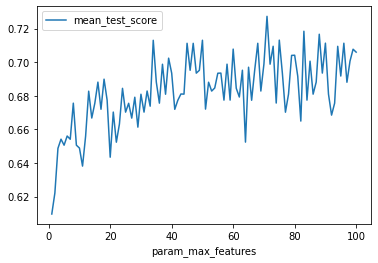

In [23]:
#max_features & acc lineplot, higher the number of features, higher accuracy
sns.lineplot(data=rf2_df)


In [24]:
#Gradient Boosting Classifier (got high acc, skip grid-search)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10,
                                 random_state=88).fit(X_train_2, y_train)
y_pred_gbc = gbc.predict(X_test_2)
model_gbc_acc = sum(y_pred_gbc == y_test) / len(y_test)# Calculate boosting accuracy
print(f'GBC Test Accuracy: {model_gbc_acc:.4f}')

GBC Test Accuracy: 0.7778


In [25]:
#Adaboost Classifier (simple version, grid-search cv not runnable)
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=88).fit(X_train_2, y_train)
#abc_grid = {'base_estimator' : ['gini', 'entropy'],
#            'algorithm' : ['SAMME', 'SAMME.R'],
#            'n_estimators' : [1],
#            'learning_rate' : np.linspace(0.1, 1, 10)
#            }
#abc_search = GridSearchCV(abc, param_grid=abc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
y_pred_abc = abc.predict(X_test_2)
model_abc_acc = sum(y_pred_abc == y_test) / len(y_test)
print(f'ABC Test Accuracy: {model_abc_acc:.4f}')
#print(abc_search.best_score_)
#abc_best = abc_search.best_estimator_

ABC Test Accuracy: 0.7460


In [26]:
##Grid-Search 5-Cross-Validation Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(random_state=88)
sgdc_grid = {"loss": ["hinge"],
             "penalty": ["l1", "l2"],
             "alpha": np.linspace(0.0001,0.0005,5)}
sgdc_search = GridSearchCV(sgdc, param_grid=sgdc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
#y_pred_sgdc = sgdc.predict(X_test_2)
#model_sgdc_acc = sum(y_pred_sgdc == y_test) / len(y_test)
print(sgdc_search.best_score_)
sgdc_best = sgdc_search.best_estimator_

0.7771965865992415


In [27]:
#Support Vector Classifier (simple version -- no grid search / no cv)
from sklearn.svm import SVC
svc = SVC(C=0.1).fit(X_train_2, y_train)
y_pred_svc = svc.predict(X_test_2)
model_svc_acc = sum(y_pred_svc == y_test) / len(y_test)
print(f'SVC Test Accuracy: {model_svc_acc:.4f}')

SVC Test Accuracy: 0.4921


In [28]:
#Grid-Search 5-Cross-Validation Support Vector Classifier (took too long to run)
# from sklearn.svm import SVC
# svc = SVC(random_state=88, probability=True)
# svc_grid = {"kernel": ["rbf"],
#              "gamma": [0.5]
#              }
# svc_search = GridSearchCV(svc, param_grid=svc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
# #y_pred_sgdc = sgdc.predict(X_test_2)
# #model_sgdc_acc = sum(y_pred_sgdc == y_test) / len(y_test)
# print(svc_search.best_score_)
# svc_best = svc_search.best_estimator_

In [29]:
# error_rate = []
# #Elbow method to find optimal k
# for i in range(1,20):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(train_data_X,train_data_Y)
#     pred_i = knn.predict(test_data_X)
#     error_rate.append(np.mean(pred_i != test_data_Y))

error_rate = []
#Elbow method to find optimal k
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_2,y_train)
    pred_i = knn.predict(X_test_2)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

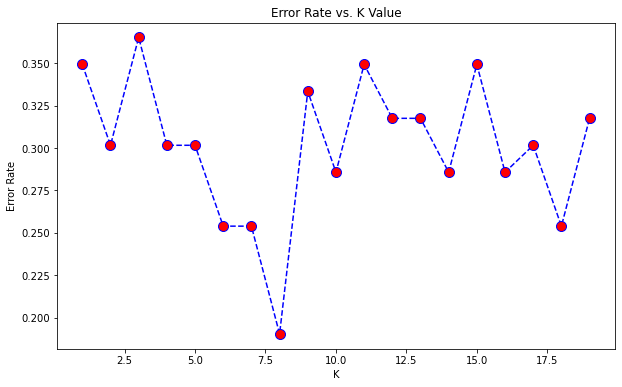

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle ='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#The plot shows the optimal n_neighbors=9

In [31]:
#Grid-Search 5Fold-Cross-Validation K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn_grid = {'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto'],
            'leaf_size' : [5, 10, 20, 30],
            }
knn_search = GridSearchCV(knn, param_grid=knn_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
print(knn_search.best_score_)
knn_best = knn_search.best_estimator_

0.6950379266750948


## predict on 16 types

In [53]:
#LDA Classifier with all 16 types
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
y_train_2, y_test_2 = train['type'], test['type']
lda = LinearDiscriminantAnalysis().fit(X_train_2, y_train_2)
model_lda_acc = lda.score(X_test_2, y_test_2)# Calculate LDA accuracy
print(f'LDA Test Accuracy: {model_lda_acc:.4f}')

LDA Test Accuracy: 0.3016


In [33]:
# Decision tree for 16 types

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt

clff = DecisionTreeClassifier(max_depth=3, criterion = 'gini', random_state = 42)
clff = clff.fit(X_train_2, y_train_2)
y_pred = clff.predict(X_test_2)
print("accuracy score of decison tree:", accuracy_score(y_test_2, y_pred))

accuracy score of decison tree: 0.19047619047619047


In [34]:
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(2, 10)}
              ]
dtree_gscv2 = GridSearchCV(clff, tree_param, cv=5)
dtree_gscv2.fit(X_train_2, y_train_2)
best_dtree_pred2 = dtree_gscv2.best_estimator_.predict(X_test_2)

print("accuracy score of decison tree:", accuracy_score(y_test_2, best_dtree_pred2))

accuracy score of decison tree: 0.42857142857142855


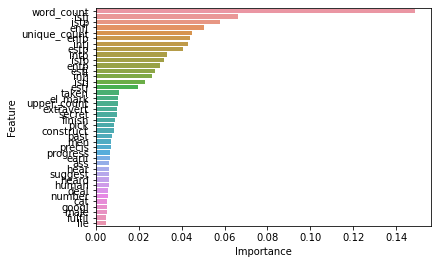

In [35]:
# filter features based on feature importance
feat_importances = pd.concat([pd.DataFrame(X_train_2.columns),pd.DataFrame(np.transpose(dtree_gscv2.best_estimator_.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(40, 'Importance'))
plt.show()

In [36]:
feat_importances.sort_values('Importance', ascending=False).head(50)

,Feature,Importance
4,word_count,0.148679
769,isfj,0.066216
774,istp,0.057862
459,enfj,0.050347
5,unique_count,0.044749
460,enfp,0.043772
754,intj,0.042793
481,estp,0.040804
755,intp,0.033203
770,isfp,0.031874


In [37]:
# SVC for 16 types
#Support Vector Classifier (simple version -- no grid search / no cv)
from sklearn.svm import SVC
svc2 = SVC(C=0.1).fit(X_train_2, y_train_2)
y_pred_svc2 = svc2.predict(X_test_2)
model_svc_acc2 = sum(y_pred_svc2 == y_test_2) / len(y_test_2)
print(f'SVC Test Accuracy: {model_svc_acc2:.4f}')

SVC Test Accuracy: 0.0476


In [38]:
#Adaboost for 16 types
#Adaboost Classifier (simple version, grid-search cv not runnable)
from sklearn.ensemble import AdaBoostClassifier
abc2 = AdaBoostClassifier(random_state=88).fit(X_train_2, y_train_2)
#abc_grid = {'base_estimator' : ['gini', 'entropy'],
#            'algorithm' : ['SAMME', 'SAMME.R'],
#            'n_estimators' : [1],
#            'learning_rate' : np.linspace(0.1, 1, 10)
#            }
#abc_search = GridSearchCV(abc, param_grid=abc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
y_pred_abc2 = abc2.predict(X_test_2)
model_abc_acc2 = sum(y_pred_abc2 == y_test_2) / len(y_test_2)
print(f'ABC Test Accuracy: {model_abc_acc2:.4f}')
#print(abc_search.best_score_)
#abc_best = abc_search.best_estimator_

ABC Test Accuracy: 0.2222


In [39]:
##Gradient Boosting for 16 types
#Gradient Boosting Classifier (got high acc, skip grid-search)
from sklearn.ensemble import GradientBoostingClassifier
gbc2 = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10,
                                 random_state=88).fit(X_train_2, y_train_2)
y_pred_gbc2 = gbc2.predict(X_test_2)
model_gbc_acc2 = sum(y_pred_gbc2 == y_test_2) / len(y_test_2)# Calculate boosting accuracy
print(f'GBC Test Accuracy: {model_gbc_acc2:.4f}')

GBC Test Accuracy: 0.4444


In [40]:
#Grid-Search 5Fold-Cross-validation Random Forest to find best max_feature
grid_values = {'max_features': np.linspace(1,100,100, dtype='int32'),
               'random_state': [88]}
rf2 = RandomForestClassifier(random_state=88)
rf2_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=1)
rf2_cv.fit(X_train_2, y_train_2)
y_pred_rf2 = rf2_cv.best_estimator_.predict(X_test_2)
model_rf2_acc = sum(y_pred_rf2 == y_test_2) / len(y_test_2)
print(f'CV Random Forest Test Accuracy: {model_rf2_acc:.4f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CV Random Forest Test Accuracy: 0.5873


In [51]:
#Grid-Search 5-Cross-Validation Support Vector Classifier (took too long to run)
from sklearn.svm import SVC
svc = SVC(random_state=88, probability=True)
svc_grid = {"kernel": ["rbf"],
             "gamma": [0.5]
             }
svc_search = GridSearchCV(svc, param_grid=svc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train_2)
y_pred_sgdc = svc_search.best_estimator_.predict(X_test_2)
model_sgdc_acc = sum(y_pred_sgdc == y_test_2) / len(y_test_2)
svc_best = svc_search.best_estimator_
print(f'SVC Accuracy: {model_sgdc_acc:.4f}')

SVC Accuracy: 0.0476
